In [257]:
import ScraperFC as src
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import seaborn as sns
import statistics
import numpy as np

#este codigo escrapea la pagina de sofascore

#ideal crear set de datos propios para no depender

src = src.Sofascore()

In [258]:
#Limpiador de links, Usalo y veras la magia
def link_cleaner(link):
    str = link.replace("id:","")
    print("* ", str)
    return str 

In [259]:
#Implementacion ERIKFORA12

'''
ADVERTENCIA!!.
El ID del link es solo codigo de liga # ID_partida.

ejemplo:
  -link original: https://www.sofascore.com/granada-cadiz/NObsEAn#id:11369454
  -NObsEAn  #  11369454 -> sin espacios
  -quedara así: NObsEAn#11369454

- Sí lo pone de otra manera fallará.
'''
#se definio la funcion para facilitar las iteraciones
def scrap_corners(match_link,index, name, arr): 
   import traceback

   #Datos
   link = link_cleaner(match_link)
 
   try:
     data = src.get_general_match_stats(link)
   except:
     traceback.print_exc()  
   #Nombre equipos
   home = src.get_team_names(link)[0]
   visitor = src.get_team_names(link)[1]

   #tiros de esquina
   home_kicks = data.iloc[index].homeValue
   visitor_kicks = data.iloc[index].awayValue
   
   print(home,": ", int(home_kicks))
   print(visitor,": ",int(visitor_kicks))

   if home == name:
      print("team encontrado")
      arr.append(home_kicks)
   elif visitor == name:
      print("team encontrado")
      arr.append(visitor_kicks)
   else:
     print(repr("Name lost"))
     

def scrap_corners_total(match_link,index, arr): 
   import traceback

   #Datos
   link = link_cleaner(match_link)
 
   try:
     data = src.get_general_match_stats(link)
   except:
     traceback.print_exc()  
   #Nombre equipos
   home = src.get_team_names(link)[0]
   visitor = src.get_team_names(link)[1]

   #tiros de esquina
   home_kicks = data.iloc[index].homeValue
   visitor_kicks = data.iloc[index].awayValue
   
   print(home,": ", int(home_kicks))
   print(visitor,": ",int(visitor_kicks))
   
   arr.append(home_kicks + visitor_kicks)

In [267]:
esquinas = []
links_partidos = ["https://www.sofascore.com/moreirense-gil-vicente/kkbsokb#id:11409114",
                  "https://www.sofascore.com/portimonense-moreirense/okbsBkb#id:11409103",
                  "https://www.sofascore.com/vizela-moreirense/okbsLcc#id:11409091",
                  "https://www.sofascore.com/casa-pia-moreirense/okbspCo#id:11409084",
                  "https://www.sofascore.com/estoril-praia-moreirense/okbsaPb#id:11409078",
                  "https://www.sofascore.com/moreirense-fc-porto/ckbsokb#id:11409067",
                  "https://www.sofascore.com/famalicao-moreirense/okbsGPu#id:11409061"]


for links in links_partidos:
  scrap_corners_total(links, 6, esquinas)

suma_esquinas = 0
print(esquinas)


for valor in esquinas:
    suma_esquinas += valor

promedio = suma_esquinas/ len(esquinas)

print(promedio)

*  https://www.sofascore.com/moreirense-gil-vicente/kkbsokb#11409114
Gil Vicente :  6
Moreirense :  6
*  https://www.sofascore.com/portimonense-moreirense/okbsBkb#11409103
Moreirense :  7
Portimonense :  7
*  https://www.sofascore.com/vizela-moreirense/okbsLcc#11409091
Vizela :  3
Moreirense :  9
*  https://www.sofascore.com/casa-pia-moreirense/okbspCo#11409084
Moreirense :  4
Casa Pia :  3
*  https://www.sofascore.com/estoril-praia-moreirense/okbsaPb#11409078
Estoril Praia :  8
Moreirense :  1
*  https://www.sofascore.com/moreirense-fc-porto/ckbsokb#11409067
FC Porto :  5
Moreirense :  1
*  https://www.sofascore.com/famalicao-moreirense/okbsGPu#11409061
Moreirense :  3
Famalicão :  4
[12.0, 14.0, 12.0, 7.0, 9.0, 6.0, 7.0]
9.571428571428571


In [266]:

esquina = []
links_partidos2 = ["https://www.sofascore.com/vitoria-sc-sporting-braga/Zjbsjkb#id:11409090",
                   "https://www.sofascore.com/benfica-sporting-braga/Zjbsgkb#id:11869726",
                   "https://www.sofascore.com/fc-porto-sporting-braga/Zjbsckb#id:11409077",
                   "https://www.sofascore.com/famalicao-sporting-braga/ZjbsGPu#id:11409072",
                   "https://www.sofascore.com/sporting-sporting-braga/Zjbsbkb#id:11925811",
                   "https://www.sofascore.com/estoril-praia-sporting-braga/ZjbsaPb#id:12006649",
                   "https://www.sofascore.com/chaves-sporting-braga/ZjbsAkb#id:11409059"]


for link in links_partidos2:
  scrap_corners_total(link, 6, esquina)

suma_esquinas = 0
print(esquina)


for valor in esquina:
    suma_esquinas += valor
    


promedio2 = suma_esquinas/ len(esquina)


print(promedio2)

*  https://www.sofascore.com/vitoria-sc-sporting-braga/Zjbsjkb#11409090
Sporting Braga :  5
Vitória SC :  6
*  https://www.sofascore.com/benfica-sporting-braga/Zjbsgkb#11869726
Benfica :  0
Sporting Braga :  2
*  https://www.sofascore.com/fc-porto-sporting-braga/Zjbsckb#11409077
FC Porto :  5
Sporting Braga :  5
*  https://www.sofascore.com/famalicao-sporting-braga/ZjbsGPu#11409072
Famalicão :  3
Sporting Braga :  4
*  https://www.sofascore.com/sporting-sporting-braga/Zjbsbkb#11925811
Sporting Braga :  1
Sporting :  2
*  https://www.sofascore.com/estoril-praia-sporting-braga/ZjbsaPb#12006649
Sporting Braga :  2
Estoril Praia :  1
*  https://www.sofascore.com/chaves-sporting-braga/ZjbsAkb#11409059
Sporting Braga :  9
Chaves :  1
[11.0, 2, 10.0, 7.0, 3, 3, 10.0]
6.571428571428571


In [268]:
def data(esquina):
    datos = len(esquina)
    cantidad = []
    dato = 1

    while datos >= dato:
        cantidad.append(dato)
        dato += 1


    return cantidad


def numero(arreglo):
    data = len(arreglo)
    data += 1
    return data


tiros1 = []
tiros2 = []

tiros1.append(data(esquina))
tiros2.append(data(esquinas))

numero1 = numero(tiros1[0])
numero2 = numero(tiros2[0])


    

In [269]:
def fx (x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

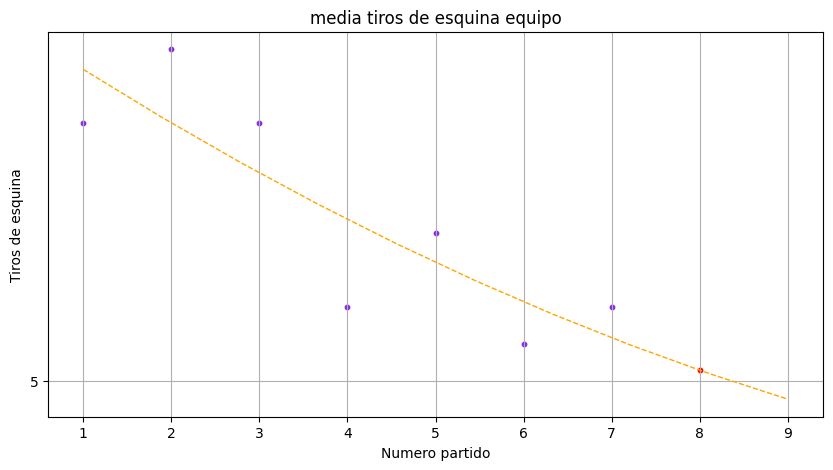

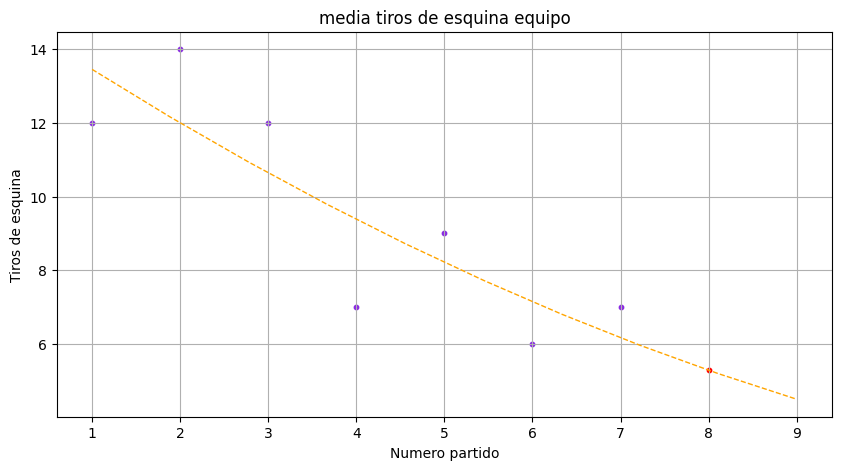

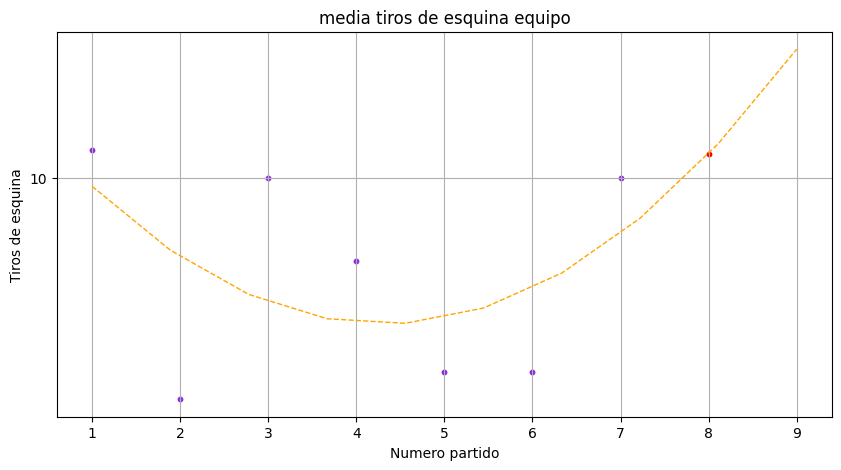

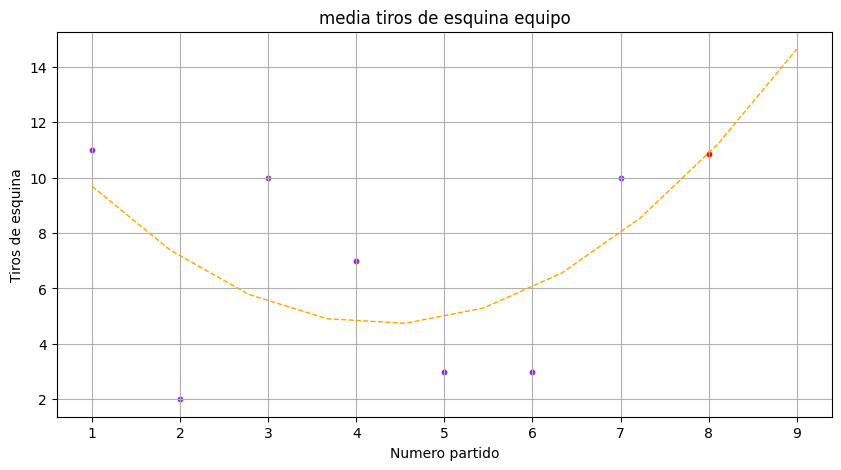

In [270]:
def grafo(final, formula, x, y, coef, mediana):
    coef = np.polyfit(x,y,coef)
    p = np.polyval(coef, final)
    plt.figure(figsize=(10,5))
    x1 = np.linspace(1,final + 1,10)
    y1 = fx(x1,formula) #funcion x,y
    plt.title("media tiros de esquina equipo")
    
    plt.scatter(x,y,s=10,c='blueviolet')
    plt.plot(x1,y1,"--",linewidth=1,color='orange')
    plt.scatter(final,p,s=10,c='red')
    plt.yticks(range(mediana,30,30))
    plt.grid("on")
    ax = plt.gca()
    ax.set_xlabel("Numero partido")
    ax.set_ylabel("Tiros de esquina")
    plt.show

def grafo_no_media(final, formula, x, y, coef):
    coef = np.polyfit(x,y,coef)
    p = np.polyval(coef, final)
    plt.figure(figsize=(10,5))
    x1 = np.linspace(1,final + 1,10)
    y1 = fx(x1,formula) #funcion x,y
    plt.title("media tiros de esquina equipo")
    
    plt.scatter(x,y,s=10,c='blueviolet')
    plt.plot(x1,y1,"--",linewidth=1,color='orange')
    plt.scatter(final,p,s=10,c='red')
    plt.grid("on")
    ax = plt.gca()
    ax.set_xlabel("Numero partido")
    ax.set_ylabel("Tiros de esquina")
    plt.show


x1 = 2
x2 = 2


min = np.amin(esquinas)
coef1 = np.polyfit(tiros2[0],esquinas,x1)
p1 = np.polyval(coef1, numero2)
#grafo
grafo(numero2, coef1, tiros2[0], esquinas,x1, int(p1))
grafo_no_media(numero2, coef1, tiros2[0], esquinas,x1)


coef2 = np.polyfit(tiros1[0],esquina,x2)
p2 = np.polyval(coef2, numero1)
#grafo
grafo(numero1, coef2, tiros1[0], esquina,x2, int(p2))
grafo_no_media(numero1, coef2, tiros1[0], esquina, x2)

#posible tendencia
total = (p1 + p2) / 2

In [271]:
prom_total = (promedio + promedio2) / 2

if promedio > promedio2:
    print(f'tiros minimos: {promedio2}')
    print(f'tiros maximos: {promedio}')
    print(f'tiros medios: {prom_total}')
    print("")
    if total <= prom_total:
        print(f"Vector negativo: resultado probable entre: {int(prom_total) + 1} a {promedio2} con tendencia a disminuir un {total}")
        print(f"posible resultado: {((prom_total/100)*total)-prom_total}")
    else:
        print(f"Vector positivo: resultado probable entre: {int(prom_total) - 1} a {promedio} con tendencia a aumentar un {total}")
        print(f"posible resultado: {((prom_total/100)*total)+prom_total}")

elif promedio2 > promedio:
    print(f'tiros minimos: {promedio}')
    print(f'tiros maximos: {promedio2}')
    print(f'tiros medios: {prom_total}')
    print("")
    if total <= prom_total:
        print(f"Vector negativo: resultado probable entre: {int(prom_total) + 1} a {promedio} con tendencia a disminuir un {total}")
        print(f"posible resultado: {((prom_total/100)*total)-prom_total}")
    else:
        print(f"Vector positivo: resultado probable entre: {int(prom_total) - 1} a {promedio2} con tendencia a aumentar un {total}")
        print(f"posible resultado: {((prom_total/100)*total)+prom_total}")

    
else:
    print(f'tiros minimos: {promedio2}')
    print(f'tiros maximos: {promedio}')
    print(f'tiros medios: {prom_total}')
    print("")
    if total <= prom_total:
        print(f"Vector negativo: resultado probable entre: {int(prom_total) + 1} a {promedio} con tendencia a disminuir un {total}")
        print(f"posible resultado: {((prom_total/100)*total)-prom_total}")
    else:
        print(f"Vector positivo: resultado probable entre: {int(prom_total) - 1} a {promedio2} con tendencia a aumentar un {total}")
        print(f"posible resultado: {((prom_total/100)*total)+prom_total}")
    
    

tiros minimos: 6.571428571428571
tiros maximos: 9.571428571428571
tiros medios: 8.071428571428571

Vector positivo: resultado probable entre: 7 a 9.571428571428571 con tendencia a aumentar un 8.071428571428587
posible resultado: 8.722908163265307
